Question 1


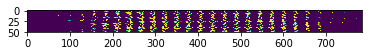

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [22]:
print("Question 1")
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
#import numpy as np

plt.show()

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
batch = mnist.train.next_batch(50)
x = batch[0]
# Create a TensorFlow Variable
plt.imshow(x)

In [23]:
print("Question 2")
print("k-fold validation is a method of splitting a dataset into k subsets. Then we train our model using k-1 subsets and use the last subset as the testing data.This procedure is applied for all the subsets. The reason for k-fold validation is to average out the error on all the folds which significantly reduces the bias and variance of the dataset.")

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


iris_data = np.loadtxt("Z:\\Machine learning\\Programs\\iris.data",delimiter=',')
print(iris_data.shape)

features = iris_data[:,0:4]
target = iris_data[:,4]

feature_names = np.genfromtxt('Z:\\Machine learning\\Programs\\feature_names.txt', \
                              delimiter=',', dtype='str')
feature_names = np.delete(feature_names,-1)
target_names = np.genfromtxt('Z:\\Machine learning\\Programs\\target_names.txt', \
                             delimiter=',', dtype='str')

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0,test_size=0.3)

print("------------SVM-----------")
clf = LinearSVC(random_state=0)
clf.fit(features_train,target_train)
scores = cross_val_score(clf, features_test, target_test,scoring='accuracy' , cv=10)
print(" Accuracy = %0.3f" % (np.mean(scores)))

k_fold = KFold(n_splits=10)
print(k_fold.get_n_splits(features))
a= clf.fit(features_train,target_train).score(features_test,target_test)
print("Accuracy of k-fold without using function is = %0.3f" %(a))

print("-----------RF--------------")
clfRF=RandomForestClassifier(n_estimators=10, bootstrap=True, max_features = 'auto')
clfRF.fit(features_train,target_train)
scores = cross_val_score(clfRF, features_test, target_test,scoring='accuracy' , cv=10)
print(" Accuracy = %0.3f" % (np.mean(scores)))


k_fold = KFold(n_splits=10)
print(k_fold.get_n_splits(features))
b= clfRF.fit(features_train,target_train).score(features_test,target_test)
print("Accuracy of k-fold without using function is = %0.3f" %(b))
print("The accuracy of cross_val function of SVM is less(93.3) than the one obtained using the fucntion(93.8%). While the accuracy of RF increases to a greater extent(95.6%) if we don't use function than is we do(93.5%).")
print("The accuracy of SVM and RF is about the same(i.e 93.8% and 93.5% respectively) based on our results. So,any of the model can be used for classification.")


Question 2
k-fold validation is a method of splitting a dataset into k subsets. Then we train our model using k-1 subsets and use the last subset as the testing data.This procedure is applied for all the subsets. The reason for k-fold validation is to average out the error on all the folds which significantly reduces the bias and variance of the dataset.
(150, 5)
------------SVM-----------
 Accuracy = 0.938
10
Accuracy of k-fold without using function is = 0.933
-----------RF--------------
 Accuracy = 0.980
10
Accuracy of k-fold without using function is = 0.978
The accuracy of cross_val function of SVM is less(93.3) than the one obtained using the fucntion(93.8%). While the accuracy of RF increases to a greater extent(95.6%) if we don't use function than is we do(93.5%).
The accuracy of SVM and RF is about the same(i.e 93.8% and 93.5% respectively) based on our results. So,any of the model can be used for classification.


In [15]:
print("Question 3")
import numpy as np
from sklearn.ensemble import RandomForestClassifier

train_data = np.loadtxt(open("Z:\\Machine learning\\wine\\wine.train","r"),
        delimiter=",",
        skiprows=0,
        dtype=np.float64
        )
test_data = np.loadtxt(open("Z:\\Machine learning\\wine\\wine.test","r"),
        delimiter=",",
        skiprows=0,
        dtype=np.float64
        )

f_train = train_data[:, 1:13]
t_train = train_data[:, 0]
f_test = test_data[:, 1:13]


print("Random forest has an advantage of working well for categorial data and it does not overfit a dataset.The average result of n decision trees is used to finalize the class. Considering all these, I would like to choose it as my model for predicting the class of the wine dataset.")
RFclf= RandomForestClassifier(n_estimators=10, bootstrap=True, max_features = 'auto')
model = RFclf.fit(f_train,t_train)
t_predict= model.predict(f_test)
np.savetxt("Z:\\Machine learning\\wine\\predict.csv", np.array((t_predict), dtype = int),fmt='%1.1f')

Question 3
Random forest has an advantage of working well for categorial data and it does not overfit a dataset.The average result of n decision trees is used to finalize the class. Considering all these, I would like to choose it as my model for predicting the class of the wine dataset.
